- packages used
  - from sklearn.datasets import fetch_california_housing
  - from statsmodels.stats.outliers_influence import variance_inflation_factor
  - from sklearn.preprocessing import StandardScaler
  - from sklearn.model_selection import train_test_split
  - from sklearn.linear_model import LinearRegression
  - from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
  - from statsmodels.stats.stattools import durbin_watson
  - import scipy.stats as stats <br>
    stats.probplot(error,dist="norm",plot=plt)
  - import pickle
  - import joblib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

- problem def
- data collection
- data preprocessing
- eda
- feature selection and scaling
- model selection and training
- assumption check
- model evaluation
- save model

### data collection

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
input_data=fetch_california_housing()["data"]
output_data=fetch_california_housing()["target"]
target_names=fetch_california_housing()["target_names"]
feature_names=fetch_california_housing()["feature_names"]

In [5]:
df=pd.DataFrame()
df[feature_names]=input_data
df[target_names[0]]=output_data
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### data preprocessing

In [6]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### feature selection and scaling

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=df.drop('MedHouseVal',axis=1)
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

[11.511140059486946,
 7.195917300645759,
 45.99360103802389,
 43.59031403163056,
 2.935745199687898,
 1.0952432155971743,
 559.8740713791312,
 633.7116543669108]

In [8]:
vif_data=pd.DataFrame(zip(X.columns,vif),columns=["feature","VIF"])
vif_data=vif_data[vif_data["VIF"]<15]
vif_data

,feature,VIF
0,MedInc,11.511140
1,HouseAge,7.195917
4,Population,2.935745
5,AveOccup,1.095243


In [9]:
new_feature=list(vif_data["feature"])
new_data=df[new_feature]
new_data

,MedInc,HouseAge,Population,AveOccup
0,8.3252,41.0,322.0,2.555556
1,8.3014,21.0,2401.0,2.109842
2,7.2574,52.0,496.0,2.802260
3,5.6431,52.0,558.0,2.547945
4,3.8462,52.0,565.0,2.181467
...,...,...,...,...
20635,1.5603,25.0,845.0,2.560606
20636,2.5568,18.0,356.0,3.122807
20637,1.7000,17.0,1007.0,2.325635
20638,1.8672,18.0,741.0,2.123209


In [10]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

scaled_data=sc.fit_transform(new_data[new_feature])
scaled_data

array([[ 2.34476576,  0.98214266, -0.9744286 , -0.04959654],
       [ 2.33223796, -0.60701891,  0.86143887, -0.09251223],
       [ 1.7826994 ,  1.85618152, -0.82077735, -0.02584253],
       ...,
       [-1.14259331, -0.92485123, -0.3695372 , -0.0717345 ],
       [-1.05458292, -0.84539315, -0.60442933, -0.09122515],
       [-0.78012947, -1.00430931, -0.03397701, -0.04368215]])

In [11]:
data_scaled = pd.DataFrame(scaled_data, columns=new_feature)
data_scaled['MedHouseVal'] = df['MedHouseVal']
data_scaled

,MedInc,HouseAge,Population,AveOccup,MedHouseVal
0,2.344766,0.982143,-0.974429,-0.049597,4.526
1,2.332238,-0.607019,0.861439,-0.092512,3.585
2,1.782699,1.856182,-0.820777,-0.025843,3.521
3,0.932968,1.856182,-0.766028,-0.050329,3.413
4,-0.012881,1.856182,-0.759847,-0.085616,3.422
...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.512592,-0.049110,0.781
20636,-0.691593,-0.845393,-0.944405,0.005021,0.771
20637,-1.142593,-0.924851,-0.369537,-0.071735,0.923
20638,-1.054583,-0.845393,-0.604429,-0.091225,0.847


### model training

In [12]:
X=data_scaled.drop('MedHouseVal',axis=1)
y=data_scaled['MedHouseVal']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### prediction

In [15]:
predictions=model.predict(X_test)
predictions

array([1.04464224, 1.51747489, 2.33318293, ..., 4.33725178, 1.72757443,
       1.72026139])

### metrics

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("mae: ",mean_absolute_error(y_test,predictions))
print("mse: ",mean_squared_error(y_test,predictions))
print("rmse: ",np.sqrt(mean_squared_error(y_test,predictions)))
print("Rsq: ",r2_score(y_test,predictions))

mae:  0.6036975650964654
mse:  0.6596869325796548
rmse:  0.8122111379312985
Rsq:  0.49657935535116504


### assumptions

In [17]:
data_scaled

,MedInc,HouseAge,Population,AveOccup,MedHouseVal
0,2.344766,0.982143,-0.974429,-0.049597,4.526
1,2.332238,-0.607019,0.861439,-0.092512,3.585
2,1.782699,1.856182,-0.820777,-0.025843,3.521
3,0.932968,1.856182,-0.766028,-0.050329,3.413
4,-0.012881,1.856182,-0.759847,-0.085616,3.422
...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.512592,-0.049110,0.781
20636,-0.691593,-0.845393,-0.944405,0.005021,0.771
20637,-1.142593,-0.924851,-0.369537,-0.071735,0.923
20638,-1.054583,-0.845393,-0.604429,-0.091225,0.847


- linearity, homoscadasticity

Text(0, 0.5, 'residual')

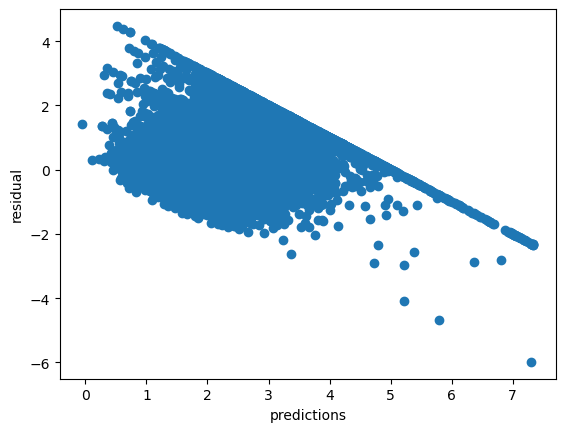

In [18]:
x = model.predict(X_train)
error = y_train - x
plt.scatter(x,error)
plt.xlabel("predictions")
plt.ylabel("residual")

- durban watson test

In [19]:
from statsmodels.stats.stattools import durbin_watson
x = model.predict(X_train)
y = y_train - x
dw=durbin_watson(y)
dw

1.9688498889297223

- normality

Text(0, 0.5, 'Frequency')

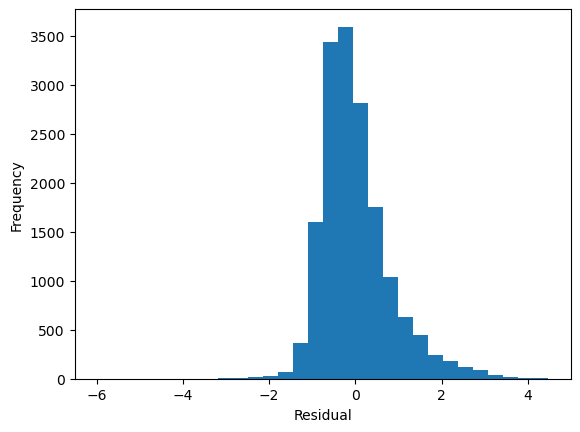

In [20]:
plt.hist(y,bins=30)
plt.xlabel("Residual")
plt.ylabel("Frequency")

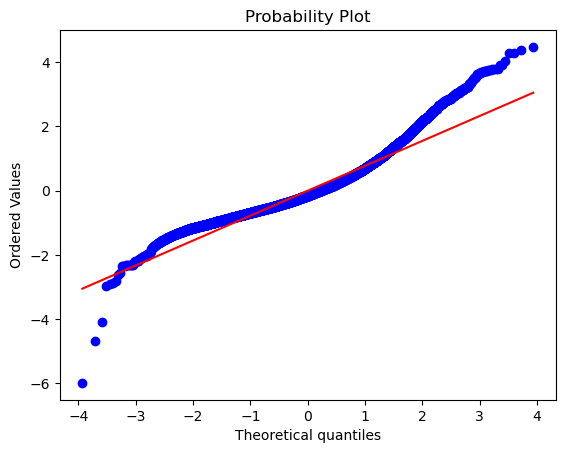

In [25]:
import scipy.stats as stats
stats.probplot(y,dist="norm",plot=plt)
plt.show()

### pickle

In [22]:
import pickle
pickle.dump(model,open("house_model.pkl","wb"))

In [23]:
import joblib
models=joblib.dump(model,"house_model.joblib")